In [1]:
import numpy as np # linear algebra
import pandas as pd # # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("C:/Users/vsubramanian/Desktop/Python/Data/ML Projects/Linear Regression/input"))
# Any results you write to the current directory are saved as output.

['Ecommerce Customers', 'TSLA.csv']


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Stock = pd.read_csv('C:/Users/vsubramanian/Desktop/Python/Data/ML Projects/Linear Regression/input/TSLA.csv')

In [4]:
Stock.head()

Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900

In [5]:
Stock.describe()

Open         High          Low        Close    Adj Close  \
count  2416.000000  2416.000000  2416.000000  2416.000000  2416.000000   
mean    186.271147   189.578224   182.916639   186.403651   186.403651   
std     118.740163   120.892329   116.857591   119.136020   119.136020   
min      16.139999    16.629999    14.980000    15.800000    15.800000   
25%      34.342498    34.897501    33.587501    34.400002    34.400002   
50%     213.035004   216.745002   208.870002   212.960007   212.960007   
75%     266.450012   270.927513   262.102501   266.774994   266.774994   
max     673.690002   786.140015   673.520020   780.000000   780.000000   

             Volume  
count  2.416000e+03  
mean   5.572722e+06  
std    4.987809e+06  
min    1.185000e+05  
25%    1.899275e+06  
50%    4.578400e+06  
75%    7.361150e+06  
max    4.706500e+07

In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

# Stock Analysis
### Let's explore the data!

For the rest of the exercise we'll only be using the numerical data of the csv file.

> Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?

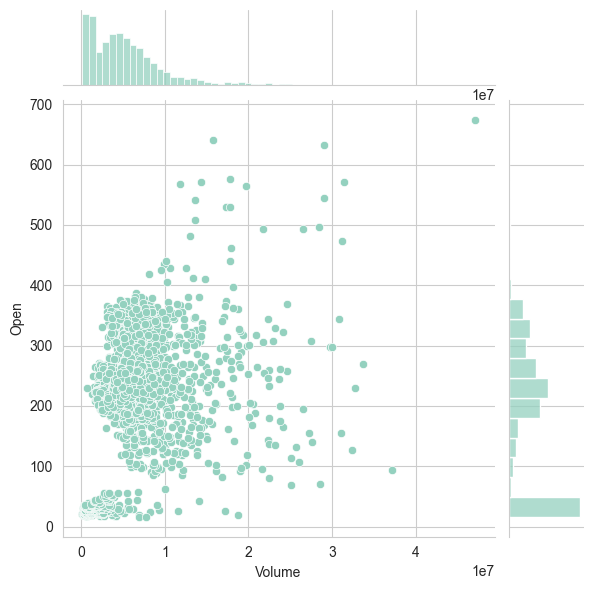

In [7]:
sns.jointplot(x='Volume',y='Open',data=Stock)

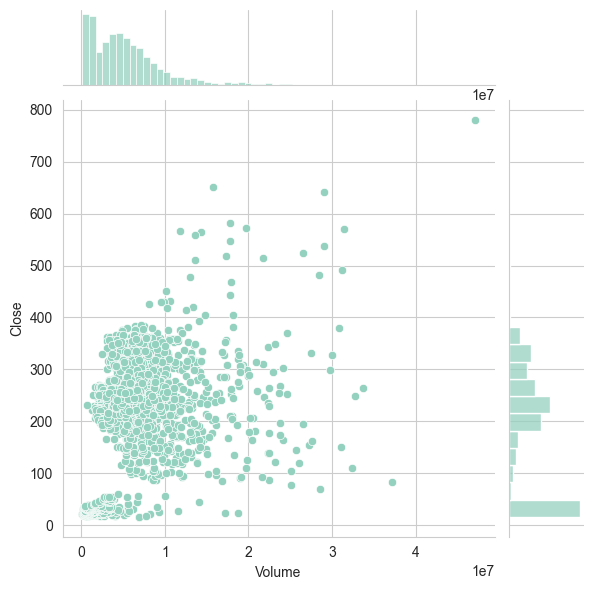

In [8]:
sns.jointplot(x='Volume',y='Close',data=Stock)

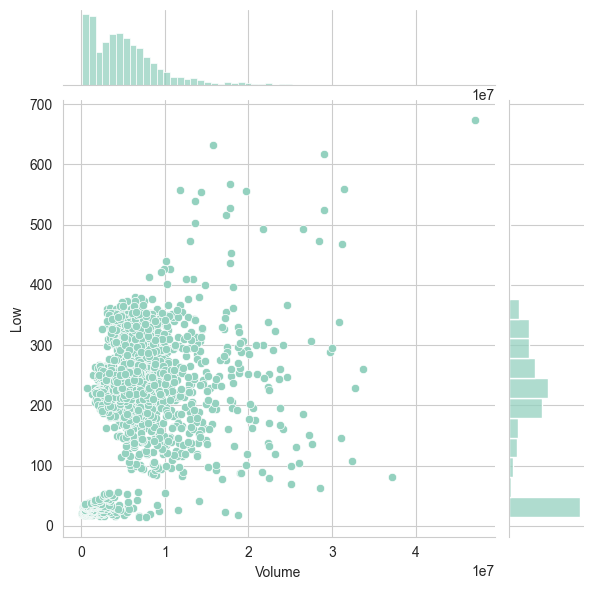

In [9]:
sns.jointplot(x='Volume',y='Low',data=Stock)

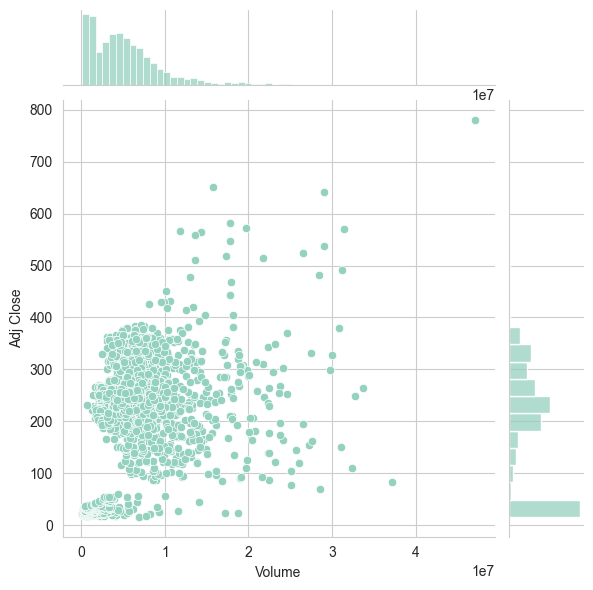

In [10]:
sns.jointplot(x='Volume',y='Adj Close',data=Stock)

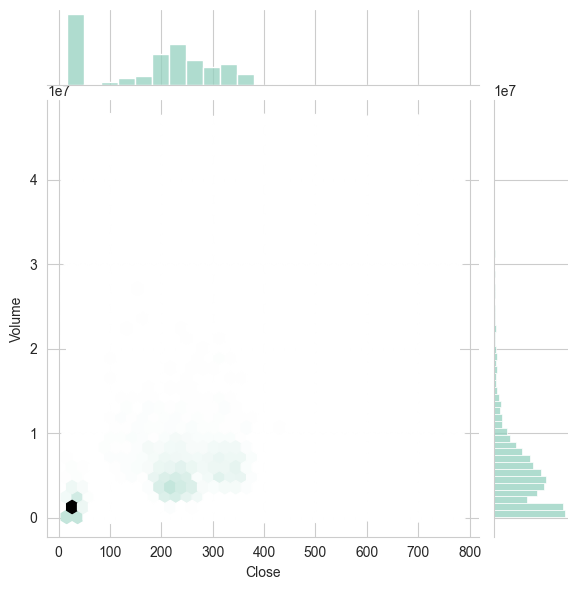

In [11]:
sns.jointplot(x='Close',y='Volume',kind="hex",data=Stock)

In [12]:
sns.pairplot(Stock)

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Axes: xlabel='Close', ylabel='Volume'>

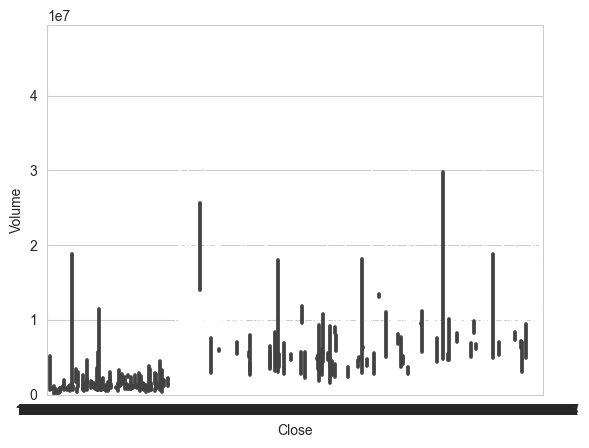

In [13]:
sns.barplot(x = 'Close',  y = 'Volume', data = Stock)

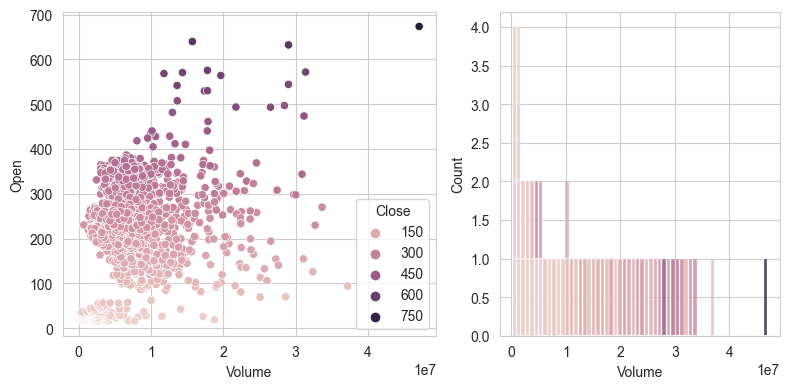

In [21]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=Stock, x="Volume", y="Open", hue="Close", ax=axs[0])
sns.histplot(data=Stock, x="Volume", hue="High", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


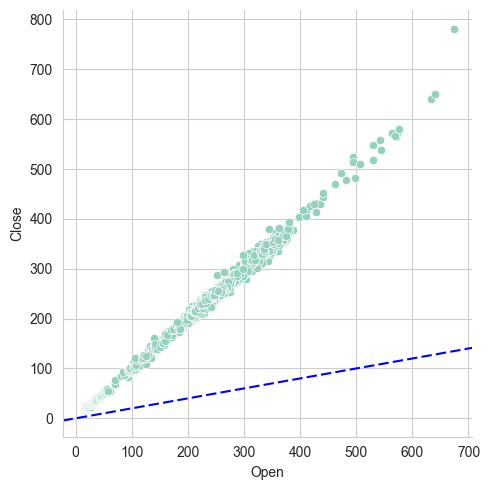

In [24]:
g = sns.relplot(data=Stock, x="Open", y="Close")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


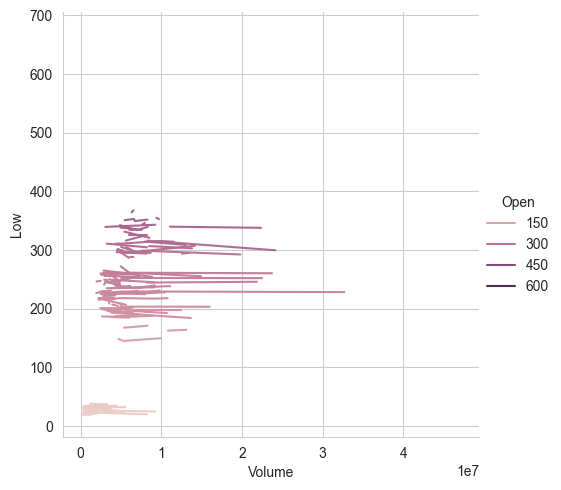

In [28]:
sns.relplot(data=Stock, x="Volume", y="Low", hue="Open", kind="line")

In [33]:
import seaborn.objects as so

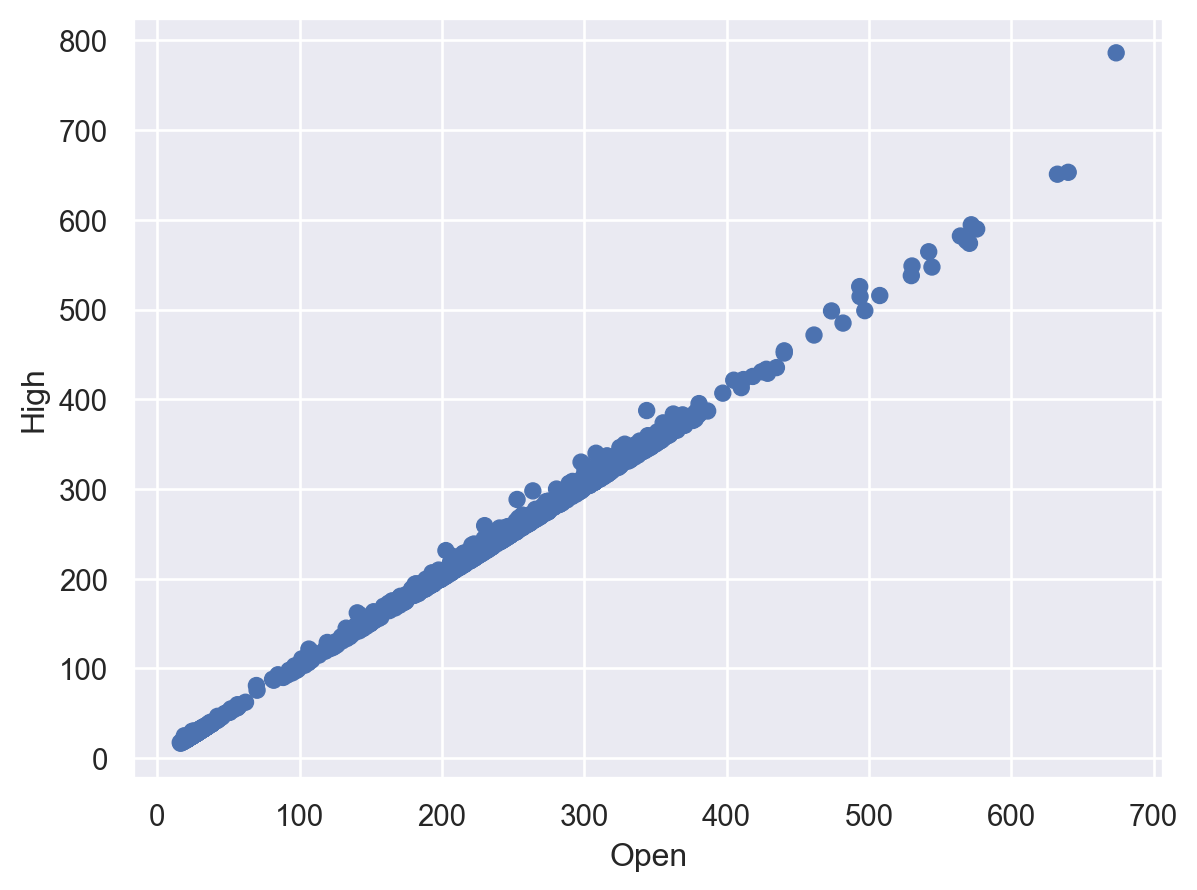

In [36]:
(
    so.Plot(Stock, x="Open", y="High")
    .add(so.Dot())
)

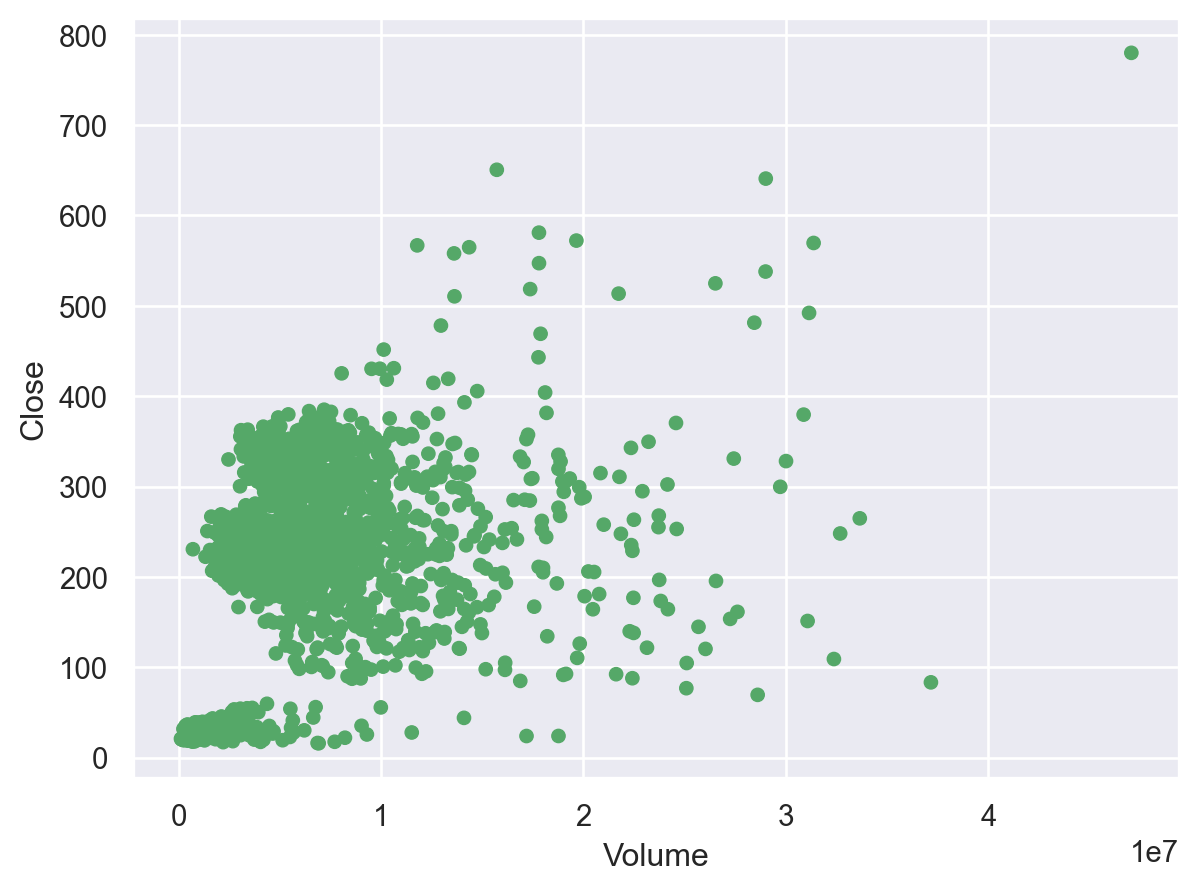

In [44]:
(
    so.Plot(Stock, x="Volume", y="Close")
    .add(so.Dot(color="g", pointsize=5))
)

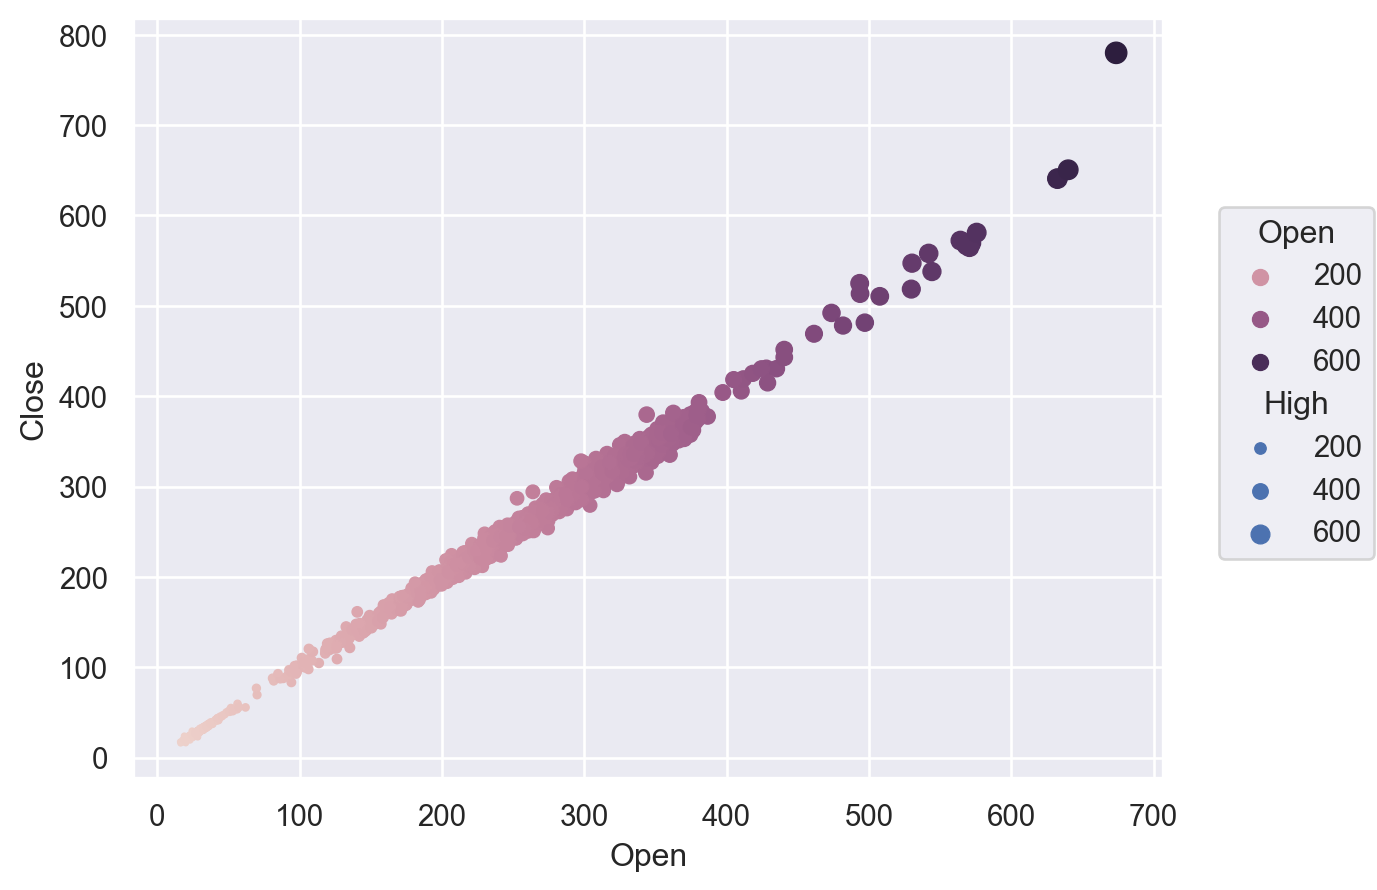

In [50]:
(
    so.Plot(
        Stock, x="Open", y="Close",
        color="Open", pointsize="High",
    )
    .add(so.Dot())
)

#### Create a linear model plot (using seaborn's lmplot) of Stock vs. Volume

In [59]:
sns.lmplot(x='Open',y='Volume',data=Stock)

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [58]:
sns.regplot(x="Close", y="Volume", data=Stock);

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


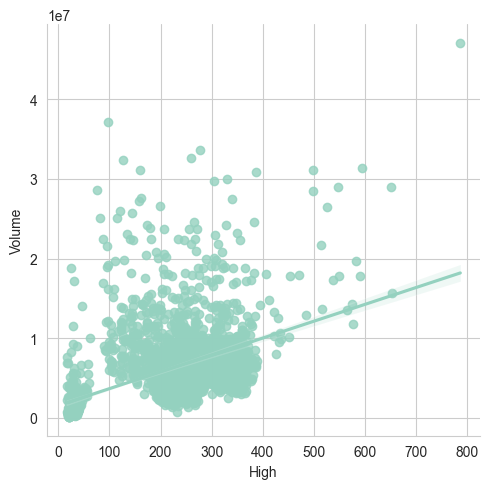

In [60]:
sns.lmplot(x="High", y="Volume", data=Stock);


In [64]:
sns.lmplot(x="High", y="Open", data=Stock, x_jitter=.15);

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


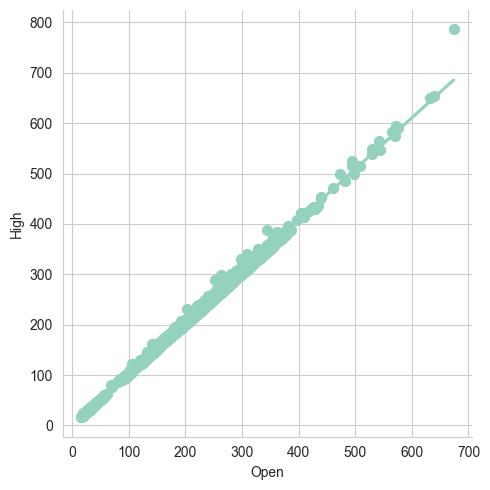

In [67]:
sns.lmplot(x="Open", y="High", data=Stock, x_estimator=np.mean);

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


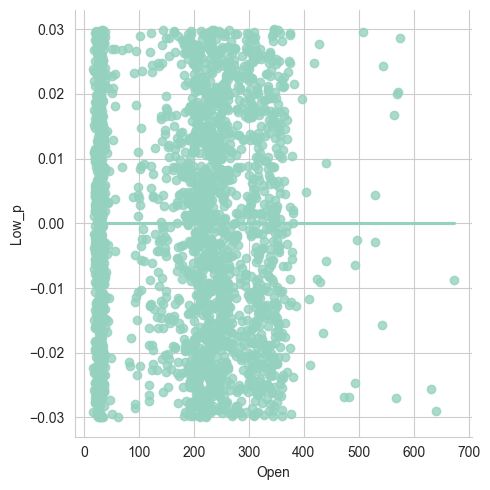

In [72]:
Stock["Low_p"] = (Stock.Low / Stock.Volume) > .15
sns.lmplot(x="Open", y="Low_p", data=Stock,
           y_jitter=.03);

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\anaconda3\envs\DataScience\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\anaconda3\envs\DataScience\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\anaconda3\envs\DataScience\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\anaconda3\envs\DataScience\Lib\site-packages\statsmod

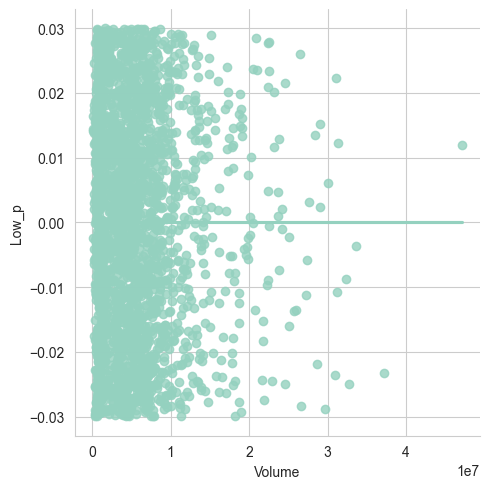

In [74]:
sns.lmplot(x="Volume", y="Low_p", data=Stock,
           logistic=True, y_jitter=.03);

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


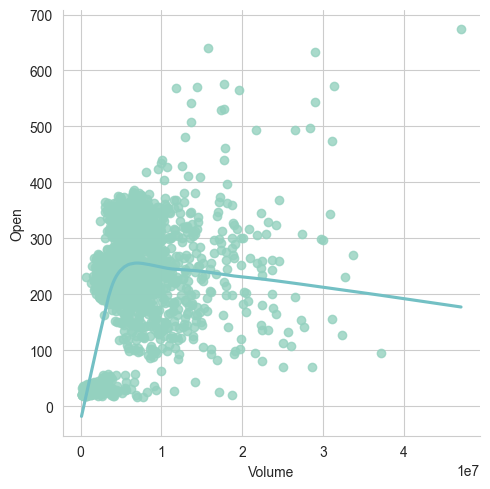

In [75]:
sns.lmplot(x="Volume", y="Open", data=Stock,
           lowess=True, line_kws={"color": "C1"});

### Training and Testing Data
Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. Set a variable X equal to the numerical features of the customers and a variable y equal to the "Volume" column.

In [78]:
X = Stock[['Open','High','Low','Close']]

In [79]:
Y = Stock['Volume']

> ### Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101 

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

NameError: name 'train_test_split' is not defined